<a href="https://colab.research.google.com/github/Thinsheep/TrainingTrack/blob/main/Deep_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [ ]:
np.random.seed(0)

In [ ]:
n_pts = 500
X, y = datasets.make_circles(n_samples = n_pts, random_state= 123, noise = 0.1, factor = 0.2) 
# the diameter of inner circle 20% of outer circle.
# a high noise (ex: 0.8) will cause the datap points to become overly convoluted, making a lot harder
#to classify the data, you want to ensure that the noise is kept relatively low (Ex:0.1)
print(X)
print(y)


[[ 6.98553633e-01 -3.78289607e-01]
 [-2.48422424e-01  1.91071221e-01]
 [-1.78759035e-01  2.53697475e-01]
 [-7.30467124e-03 -2.59266690e-01]
 [-1.59844140e-01  2.66915921e-01]
 [-8.01071690e-01 -1.08656135e-01]
 [ 1.00816914e+00  2.07309295e-01]
 [ 4.39780516e-02 -2.80236072e-01]
 [-8.34853704e-02 -1.38114367e-01]
 [-9.88928208e-01 -9.26102014e-02]
 [ 8.83638650e-02  1.96647051e-01]
 [ 2.22010570e-01  5.62848283e-02]
 [ 7.74176833e-01  8.22258534e-01]
 [ 6.42098042e-02  1.77475658e-01]
 [ 3.29904597e-01 -6.76348560e-02]
 [ 9.37162087e-01  2.05987221e-01]
 [-2.00792169e-01  5.35547075e-02]
 [ 5.32997317e-02 -2.82138380e-01]
 [-9.93783900e-02 -3.28183801e-01]
 [ 1.02684872e+00 -2.66939738e-01]
 [-8.69193490e-01  6.85448273e-01]
 [-6.70339467e-03  2.44518907e-01]
 [ 2.31538284e-02 -8.12416827e-01]
 [ 1.03822075e-01  1.19298417e-01]
 [-9.57389366e-01 -3.49206448e-01]
 [-7.98982279e-02  2.30581375e-01]
 [ 1.31496662e-01  4.30585961e-02]
 [ 3.68169092e-02  9.51356467e-01]
 [ 6.71357733e-01 -8

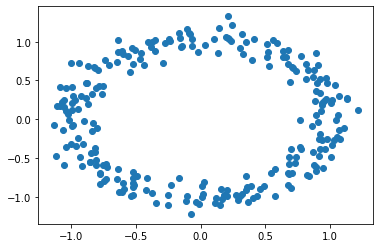

In [ ]:
plt.scatter(X[y==0, 0], X[y==0, 1])
# label of 0 is the outer region

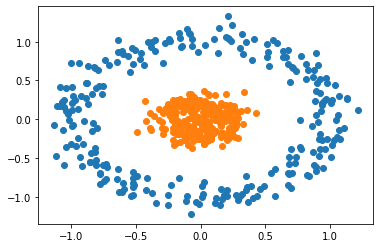

In [ ]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
# label of 0 is the inner region
# this dataset cannot be classified by a single line but a deep neural network

In [ ]:
model = Sequential()
model.add(Dense(4, input_shape=(2,), activation='sigmoid')) # hidden layer with 4 node
#input_shape(2,) is the number of nodes in the input layer
model.add(Dense(1, activation = 'sigmoid')) # output layer with 1 node
model.compile(Adam(lr = 0.01), 'binary_crossentropy', metrics=['accuracy'])


In [ ]:
h = model.fit(x=X, y=y, verbose = 1, batch_size = 20, epochs = 100, shuffle = 'true')# to pass the training data


Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6951 - accuracy: 0.4380
Epoch 2/100
25/25 [==============================] - 0s 961us/step - loss: 0.6936 - accuracy: 0.6200
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.4660
Epoch 4/100
25/25 [==============================] - 0s 879us/step - loss: 0.6923 - accuracy: 0.5320
Epoch 5/100
25/25 [==============================] - 0s 938us/step - loss: 0.6922 - accuracy: 0.5840
Epoch 6/100
25/25 [==============================] - 0s 909us/step - loss: 0.6921 - accuracy: 0.5360
Epoch 7/100
25/25 [==============================] - 0s 935us/step - loss: 0.6910 - accuracy: 0.5680
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6907 - accuracy: 0.6080
Epoch 9/100
25/25 [==============================] - 0s 955us/step - loss: 0.6894 - accuracy: 0.6320
Epoch 10/100
25/25 [==============================] - 0s 946us/step - loss: 0.6879 - accuracy: 0.

Text(0.5, 1.0, 'accuracy')

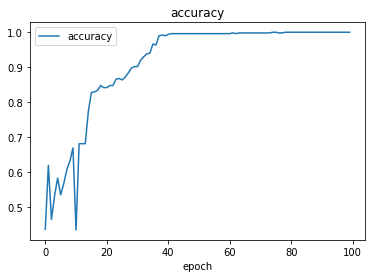

In [ ]:
plt.plot(h.history['accuracy'])
plt.xlabel('epoch')
plt.legend(['accuracy'])
plt.title('accuracy')
# our dataset is more complex so it take more epochs to reach the highest accuracy level comparing to previous example

Text(0.5, 1.0, 'loss')

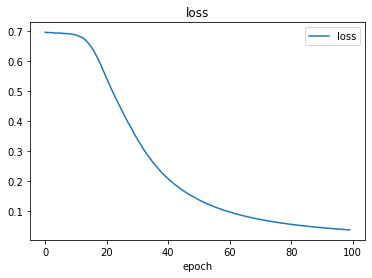

In [ ]:
plt.plot(h.history['loss'])
plt.xlabel('epoch')
plt.legend(['loss'])
plt.title('loss')
# draw the loss function

In [ ]:
def plot_decision_boundary(X, y, model): # model contain all neutral network data, X and y are two classes.
  x_span = np.linspace(min(X[:, 1]) -0.25 , max(X[:, 1]) + 0.25, 50 ) #: mean every single row, min(X[:, 0]) give minimum value of first column
  # all value of the first index column, maximum horizontal value of first column
  # from minimum horizontal coordinate to maximum horizontal coordinate
  y_span = np.linspace(min(X[:, 1]) -0.25, max(X[:, 1]) + 0.25, 50)
  xx, yy = np.meshgrid(x_span, y_span) # allow return coordinate matrix from (convert to 50x50 matrix)
  xx_, yy_ = xx.ravel(), yy.ravel() # .ravel() change to one dimensional array
  grid = np.c_[xx_, yy_]
  pred_func = model.predict(grid)
  z = pred_func.reshape(xx.shape)
  plt.contourf(xx, yy, z)

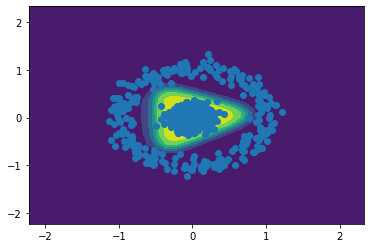

In [ ]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts, 0], X[:n_pts, 1])
plt.scatter(X[n_pts:, 0], X[n_pts:, 1])

Prediction is:  [[0.9844722]]


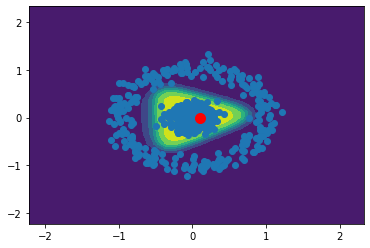

In [ ]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts, 0], X[:n_pts, 1])
plt.scatter(X[n_pts:, 0], X[n_pts:, 1])
x = 0.1
y = 0
point = np.array([[x, y]])
prediction = model.predict(point)
plt.plot([x], [y], marker ='o', markersize = 10, color = "red")
print("Prediction is: ", prediction)
# there is two class 0 and 1, the prediction is 0.98 nearly 1, prediction is correct